<h1>Introduction</h1>
<p>The task is to implement a relatively simple spam filter.  We will use a small data set to train and test the model</p>
    
<p>The messages within the datasets have already been classified as ham (not spam), or spam. </p>

<p>The implementation of a Naïve Bayes Spam Filter is relatively straight forward using scikit-learn, however, this library hides the implementation details (and many solutions are available on the Internet).  Therefore, we are not going to use it.</p>
<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

<h1>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h1>

<p>Where:</p>
<p>$P\left(S\middle|\ E\right)$, the probability that the message is spam given the event occurred.</p>
<p>$P\left(S\right)$, the prior probability that a message is spam.</p>
<p>$P\left(\lnot S\right)$, the prior probability that a message is not spam.  </p>

Note:  $P\left(S\right)$ and $P\left(\lnot S\right)$ are prior values, or prior beliefs.  This value could be calculated using the number of spam and number of ham classifications in the data set.  we could also use arbitrary values, for example; we could assume that of all email messages sent, 80% of them are spam and 20% of them are not spam.  The success of the filter depends on the prior values.

<p>$P\left(E\middle|\ S\right)$, the probability that event E occurs in a spam emails.</p>

<p>$P\left(E|\lnot S\right)$, the probability that event E occurs in non-spam emails.</p>


<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>Starting by importing pandas and read the dataset into a DataFrame named df.</p>


In [1]:
import pandas as pd
import string

# using character encoding "latin-1" because dataset has some char that are not part of default "UTF-8"
df = pd.read_csv("spam.csv", encoding= "latin-1")
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


<h3>2. Clean the data</h3>
<p>We are only interested in words, so cleaning the data so that all punctuations are removed.  We should be left with a dataset that only contains alpha characters (including spaces).  We should also ensure all the words are lowercase.  Storing the cleaned data into a DataFrame named clean.</p>



In [2]:
# Remove Columns
clean = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"] , axis = 1)
# Rename Columns
clean = clean.rename(columns = {"v1": "Category","v2": "Message"})
# All messages to Lower Case
clean["Message"] = clean["Message"].str.lower()
# All punctuations removed
clean['Message'] = clean['Message'].str.replace('[{}]'.format(string.punctuation), '', regex=True)

clean

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


<h3>3. Split the Data</h3>
<p>Splitting the data into two random samples, one for training the model and the other for testing the model.  Creating DataFrames named train_data and test_data.  The train_data DataFrame should contain 75% of the data and the test_data DataFrame the remaining 25%.<p>  


In [3]:
# 75% for train
data = 0.75*(clean.shape[0])

#.iloc is used to select specific rows and columns in your DataFrame
#.iloc[[rows],[columns]]
train_data = clean.iloc[:int(data)]
test_data = clean.iloc[int(data):]

test_data

,Category,Message
4179,ham,swhrt how u deyhope ur ok tot about u 2daylove...
4180,ham,ok da i already planned i wil pick you
4181,spam,urgent please call 0906346330 your abta compli...
4182,ham,sorry ill call later in meeting
4183,ham,i just really need shit before tomorrow and i ...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


<h3>4. Create a Word Frequency DataFrame</h3>
<p>Creating a new DataFrame named word_freq that contains each word with the number of times it appears in a spam and a ham message.  We should use the train_data not the test_data.</p>


In [4]:
# split messages to into spam and ham
spam_messages = " " + train_data[train_data['Category'] == 'spam']['Message']  + " "
ham_messages = " " + train_data[train_data['Category'] == 'ham']['Message']  + " "

# first concatenate all the messages (separating each message with a space) and then spliting them into words (whitespace as a delimiter)
spam_words = spam_messages.str.cat(sep=' ').split()
ham_words = ham_messages.str.cat(sep=' ').split()

# performs a frequency count of each unique word
spam_word_freq = pd.DataFrame(spam_words).value_counts()
ham_word_freq = pd.DataFrame(ham_words).value_counts()

# make a dataframe for both categories
word_freq = pd.DataFrame({"#Spam" : (spam_word_freq), "#Ham" : (ham_word_freq)}).fillna(0)

# adding index column
word_freq = word_freq.reset_index()

# rename word's column
word_freq = word_freq.rename(columns = {0:"Word"})

# test
word_freq[word_freq["Word"] == "have"]



,Word,#Spam,#Ham
3496,have,102.0,338.0


<h3>5.  Visualise the Data</h3>
<p>Let's use a Word Cloud library to visualise the most common words contained in spam messages.</p>




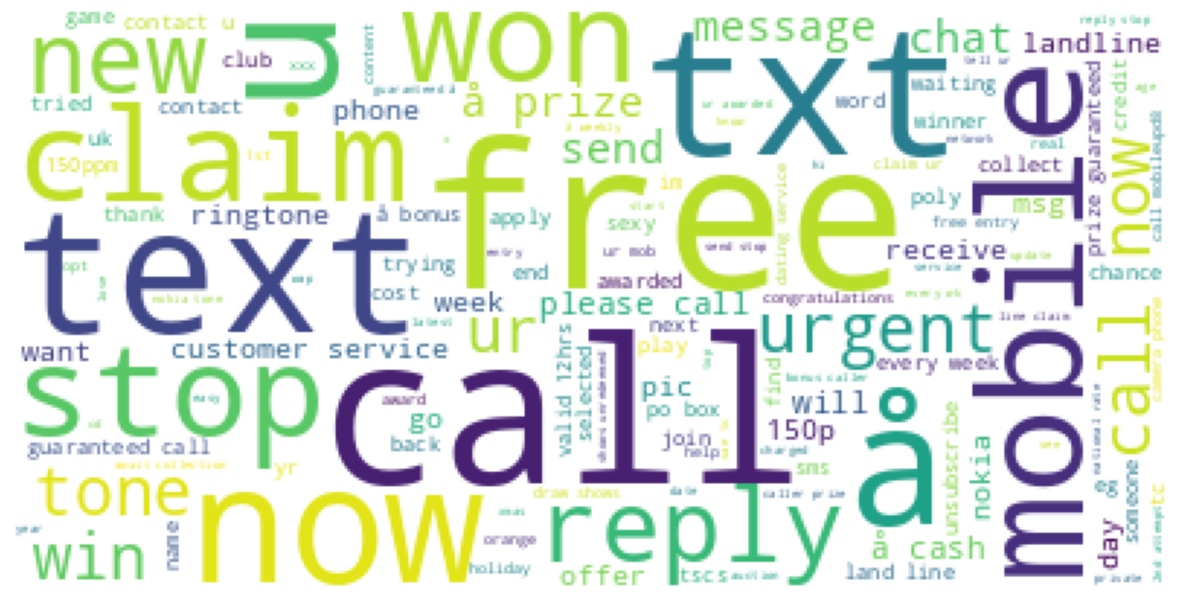

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white", max_font_size=70)

wordcloud.generate(' '.join(spam_words))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>Next creating a new DataFrame named word_prob that gives the probability of each word being found in a spam and ham message.</p>
<p>To calculate the probability of a word being spam we divide the number of times the word was found in spam by the total number of spam messages, likewise to calculate the probability of each word being found in a ham message we divide the number of times the word was found in a ham message by the total number of ham messages.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, we use a pseudocount k and estimate the probability of seeing the word. This is known as smoothing and results in the following formula when k = 0.5, for example.</p>
<p>Essentially $P\left(E\middle| S\right)$ means "What is the likelihood that this word appears in a message, knowing that the message is spam?"

$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).</p>
<p>Likewise, for $P\left(E|\lnot S\right)$.</p>


In [6]:
k = 0.5
word_prob = word_freq.copy()
for i in range (0,word_freq.shape[0]):
    # .iat provides cell vlaue at [row,column]
    word = " " + word_freq.iat[i, 0] + " "
    in_spam = 0
    in_ham = 0
    # calculating how many spam/ham messages containes this word
    for j in spam_messages:
        if word in j:
            in_spam += 1
    for m in ham_messages:
        if word in m:
            in_ham += 1

    # calculating P(E|S) and P(E|-S)
    word_prob.iat[i,1] = (in_spam + k) / (len(spam_messages) + (2 * k))
    word_prob.iat[i,2] = (in_ham + k) / (len(ham_messages) + (2 * k))

word_prob = word_prob.rename(columns = {"#Spam" : "P(E|S)", "#Ham" : "P(E|-S)"})

word_prob


,Word,P(E|S),P(E|-S)
0,0,0.002650,0.000138
1,008704050406,0.004417,0.000138
2,0089my,0.002650,0.000138
3,01223585236,0.002650,0.000138
4,01223585334,0.004417,0.000138
...,...,...,...
8236,åômorrow,0.000883,0.000415
8237,åôrents,0.000883,0.000415
8238,ì,0.000883,0.020055
8239,ìll,0.000883,0.000692


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>
<p>We need to decide on the prior values $P\left(S\right)$ and $P\left(\lnot S\right)$, this is where we can experiment and tweak the model, in this example the prior value for spam was set to $0.4$ and the prior value for not spam or ham was set to $0.6$.</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>


In [ ]:
# a = P(S|E)
# m = P(E|S)
# n = P(S)
# p = P(E|-S)
# q = P(-S)

word = input("enter a word : ")

n = 0.4
q = 0.6

# find P(E|S) of that word
try:
    m = word_prob[word_prob["Word"] == word]["P(E|S)"].item()
except Exception as e:
    print("word not found")

# find P(E|-S) of that word
p = word_prob[word_prob["Word"] == word]["P(E|-S)"].item()

# bayes theoram
a = (m*n)/((m*n)+(p*q))

print(f"Word = ['{word}'] \nP(E|S) = [{m}]\nP(E|¬S) = [{p}]\nP(S|E) = [{a}]\nP(¬S|E) = [{1-a}]")

<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  <h5>The model assumes the words appear as independent events hence the naïve Bayes. </h5>In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

Calculating the probability for each word in a message being spam, we might want to store the calculations in a list named prob_spam.  Likewise creating a list for each word not being spam.
Then multiplying the probabilities and compare the results.  If the result of multiplying the probabiliti**es for spam is greater than the result of multiplying the probabilities for not spam, then we assume the message as spam.
</p>


In [ ]:
message = input("enter a message : ")

# n = P(S)
n = 0.4

# q = P(-S)
q = 0.6

# m = P(E|S)
prob_m = []

# p = P(E|-S)
prob_p = []

# words to list
words = message.split()

# appending P(E|S) and P(E|-S) of each word in the sentence to the lists defined above
for i in words:
    if i in word_prob["Word"].tolist():
        word = i
        m = word_prob[word_prob["Word"] == word]["P(E|S)"].item()
        p = word_prob[word_prob["Word"] == word]["P(E|-S)"].item()
        prob_m.append(m)
        prob_p.append(p)

# multiplying P(E|S) and P(S)
prodm = 1
for num in prob_m:
    prodm *= num
prodm *= n

# multiplying P(E|-S) and P(-S)
prodp = 1
for num in prob_p:
    prodp *= num
prodp *= q

# naive bayes theoram
prob_spam = ((prodm)/(prodm + prodp))
prob_ham = ((prodp)/(prodm + prodp))

# classify ham or spam based on higher probability
if prob_ham >= prob_spam:
    result = "ham"
else:
    result = "spam"

print(f"Probability of message being spam is {round(prob_spam,2)}, ham is {round(prob_ham,2)}, As the probability of message being '{result}' is greater, hence the message is '{result}'.")


<h3>9. Avoiding floating point underflow</h3>
<p>Our aim is to compare two probabilities $P(S|x_1,\dots,x_n)$ with $P(\neg S|x_1,\dots,x_n),$ according to our model introduced in Section 8, both probabilities share a common denominator which does not affect comparison. Hence we will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$
</p>

<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):</p>
$$
P(S|x_1,x_2,\dots,x_n)\propto P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_n|S)$$
<p>becomes</p>
$$\log(P(S|x_1,x_2,\dots,x_n))\propto \log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_n|S)\right)=$$ $$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>So, to check spam or ham we just compare:</p>
$$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>and </p>
$$
\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_n|\neg S))
$$


Changing the equation so that logs are used.
</p>


In [ ]:
import numpy as np

message = input("enter a message : ")
n = 0.4
q = 0.6
prob_spam = [n]
prob_ham = [q]
prod_ham = 0
prod_spam = 0

words = message.split()
for i in words:
    if i in word_prob["Word"].tolist():
        word = i
        m = word_prob[word_prob["Word"] == word]["P(E|S)"].item()
        p = word_prob[word_prob["Word"] == word]["P(E|-S)"].item()
        prob_spam.append(m)
        prob_ham.append(p)

# now adding in a log manner
for num in prob_ham:
    prod_ham += np.log(num)

for num in prob_spam:
    prod_spam += np.log(num)

if prod_ham >= prod_spam:
    result = "ham"
else:
    result = "spam"

print(f"Probability of message being spam is {round(prod_spam,2)}, ham is {round(prod_ham,2)}, As the probability of message being '{result}', hence the message is '{result}'.")


<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set. Implementing counters that displays how our model has performed and calculate the accuracy of the model.</p>


In [ ]:
import numpy as np
result_data = []

# going through all messages in test_data
for w in test_data["Message"].tolist():
    message =  w
    n = 0.4
    q = 0.6
    prob_spam = [n]
    prob_ham = [q]
    prod_ham = 0
    prod_spam = 0

    # going through all words in a particular message
    words = message.split()
    for i in words:
        if i in word_prob["Word"].tolist():
            word = i
            m = word_prob[word_prob["Word"] == word]["P(E|S)"].item()
            p = word_prob[word_prob["Word"] == word]["P(E|-S)"].item()
            prob_spam.append(m)
            prob_ham.append(p)

    for num in prob_ham:
        prod_ham += np.log(num)

    for num in prob_spam:
        prod_spam += np.log(num)

    if prod_ham >= prod_spam:
        result = "ham"
    else:
        result = "spam"

    result_data.append(result)



In [ ]:
match_ham = 0
match_spam = 0
thought_ham_is_spam = 0
thought_spam_is_ham = 0

predicted_data = pd.DataFrame()
predicted_data = test_data.copy()
predicted_data["Predicted"] = result_data

for i in range(predicted_data.shape[0]):
    if predicted_data.iat[i,0] == predicted_data.iat[i,2]:
        if predicted_data.iat[i,0] == "ham":
            match_ham += 1
        else:
            match_spam += 1

    else:
        if predicted_data.iat[i,0] =="ham":
            thought_ham_is_spam += 1
        else:
            thought_spam_is_ham += 1

print(f"match_ham = {match_ham} \nmatch_spam = {match_spam} \nthought_ham_is_spam = {thought_ham_is_spam} \nthought_spam_is_ham = {thought_spam_is_ham} \nAccuracy = {(match_ham + match_spam)/(test_data.shape[0])}")
predicted_data.head(20)

<h3>11. Improvements</h3>
<p>Giving some suggestions or recommendations on how the accuracy of the model could be improved.</p>


--- As we can see clearly thought_ham_is_spam = 192, which are misclassified hams.
This is happening because our training data is limited, hence, if we have more data of ham and spam messages,
We can better train our model.
We can observe this by getting an accuracy increase of 2% when making training data as 90% of original data.

--- We also know that, we only had one feature (Spam/Ham) to classify the messages. If we have more features like context of messages, sender details etc. to train the model, we could have classified the messages better.